<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/tensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

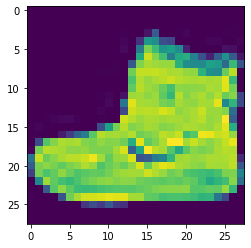

In [108]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])

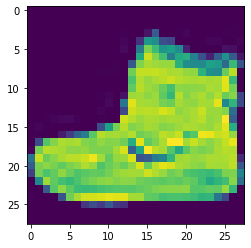

In [112]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.imshow(train_images[0])

In [113]:
model =tf.keras.models.Sequential([
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1536, activation=tf.nn.relu),
                           tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4710 - accuracy: 0.8316
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3587 - accuracy: 0.8685
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3215 - accuracy: 0.8808
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.8898
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.8968
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2637 - accuracy: 0.9021
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2497 - accuracy: 0.9082
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2384 - accuracy: 0.9109
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2288 - accuracy: 0.9145
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.221

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_4 (Dense)              (32, 1024)                803840    
_________________________________________________________________
dense_5 (Dense)              (32, 10)                  10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [111]:
# accuracy

model.evaluate(test_images, test_labels)

model.evaluate(train_images, train_labels)


1875/1875 [==============================] - 3s 2ms/step - loss: 0.3873 - accuracy: 0.8721


[0.3873157799243927, 0.8721166849136353]

In [106]:
classification = model.predict(test_images)


1.0

In [120]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>.99:
      print('\nRechead 90% accuracy so cancelling training')
      self.model.stop_training = True

callback = myCallback()

model.fit(train_images, train_labels, epochs=15, callbacks=[callback])

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1255 - accuracy: 0.9524
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9546
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.9541
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9545
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1142 - accuracy: 0.9566
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1157 - accuracy: 0.9564
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1096 - accuracy: 0.9587
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1076 - accuracy: 0.9601
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1053 - accuracy: 0.9603
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.105